<a href="https://colab.research.google.com/github/juansevecchi9/gasoline_efficiency_predictor/blob/main/House_price_prediction_(regression_template_2_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.8.2


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
# Read dataset

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']


df = pd.read_csv(dataset_path, names = column_names, na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)


df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# Checking for na values
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
#One hot encoding for origin label
origin = df.iloc[:,7]
print(origin)


0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64


In [ ]:
df['USA'] = (origin == 1)*1.0
df['Europe'] = (origin == 2)*1.0
df['Japan'] = (origin == 3)*1.0
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1.0,0.0,0.0


In [ ]:

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(X)
print(y)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     Origin  USA  Europe  Japan  
0         1  1.0     0.0    0

In [ ]:
train_stats_x = X_train.describe()
train_stats_x = train_stats_x.transpose()
train_stats_x

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.476038,1.720978,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,193.592652,104.879988,68.0,98.0,146.0,302.0,455.0
Horsepower,313.0,104.332268,38.535508,46.0,75.0,93.0,129.0,230.0
Weight,313.0,2960.722045,843.219176,1649.0,2215.0,2807.0,3609.0,5140.0
Acceleration,313.0,15.461022,2.714529,8.0,13.7,15.5,17.0,24.6
Model Year,313.0,75.894569,3.660041,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.587859,0.808278,1.0,1.0,1.0,2.0,3.0
USA,313.0,0.616613,0.486990,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.178914,0.383894,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.204473,0.403962,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_stats_y = Y_train.describe()
train_stats_y = train_stats_y.transpose()
train_stats_y

count    313.000000
mean      23.426837
std        7.857520
min        9.000000
25%       17.000000
50%       22.000000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [ ]:
def norm_X(x):
  return (x - train_stats_x['mean']) / train_stats_x['std']


  
normed_train_data_X = norm_X(X_train)
normed_test_data_X = norm_X(X_val)



normed_train_data_X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan
7,1.466586,2.349422,2.871838,1.602523,-2.564357,-1.610520,-0.727298,0.787258,-0.46605,-0.506169
219,-0.857674,-0.682615,-0.216223,-0.783571,0.014359,0.302027,-0.727298,0.787258,-0.46605,-0.506169
225,0.304456,0.537828,0.147078,0.663265,0.345908,0.302027,-0.727298,0.787258,-0.46605,-0.506169
239,-0.857674,-0.920983,-0.968776,-1.157139,0.345908,0.302027,1.747097,-1.266173,-0.46605,1.969313
66,1.466586,1.052702,1.185082,0.843527,-1.459193,-1.064078,-0.727298,0.787258,-0.46605,-0.506169
...,...,...,...,...,...,...,...,...,...,...
376,-0.857674,-0.978191,-0.942826,-1.109702,1.009007,1.668132,1.747097,-1.266173,-0.46605,1.969313
187,1.466586,1.062236,0.925581,1.487487,-0.906611,0.028806,-0.727298,0.787258,-0.46605,-0.506169
264,1.466586,1.033632,0.899631,0.289697,-1.569710,0.575248,-0.727298,0.787258,-0.46605,-0.506169
61,-0.857674,-0.682615,-0.475724,-0.871330,0.382747,-1.064078,-0.727298,0.787258,-0.46605,-0.506169


In [ ]:
def norm_y(y):
  return (y - train_stats_y['mean']) / train_stats_y['std']
normed_train_data_y = norm_y(Y_train)
normed_test_data_y = norm_y(Y_val)


normed_train_data_y

7     -1.199722
219    0.263844
225   -0.754288
239    0.836544
66    -0.817922
         ...   
376    1.727411
187   -0.754288
264   -0.677929
61    -0.308855
192   -0.181589
Name: MPG, Length: 313, dtype: float64

In [ ]:

model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])


In [ ]:
hist = model.fit(normed_train_data_X, normed_train_data_y,
          batch_size=32, epochs=100,
          validation_data=(normed_test_data_X, normed_test_data_y))

Epoch 1/100
10/10 [==============================] - 2s 41ms/step - loss: 0.4435 - mae: 0.4979 - mse: 0.4435 - val_loss: 0.2452 - val_mae: 0.3907 - val_mse: 0.2452
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2148 - mae: 0.3257 - mse: 0.2148 - val_loss: 0.2164 - val_mae: 0.3528 - val_mse: 0.2164
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1787 - mae: 0.3010 - mse: 0.1787 - val_loss: 0.1945 - val_mae: 0.3338 - val_mse: 0.1945
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1523 - mae: 0.2837 - mse: 0.1523 - val_loss: 0.1921 - val_mae: 0.3288 - val_mse: 0.1921
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1391 - mae: 0.2637 - mse: 0.1391 - val_loss: 0.1725 - val_mae: 0.3152 - val_mse: 0.1725
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1275 - mae: 0.2614 - mse: 0.1275 - val_loss: 0.1685 - val_mae: 0.3185 - val_mse: 0.1685
Epoch 7/100
10/10 [

In [ ]:
example_batch = normed_train_data_X[:10]
example_result = model.predict(example_batch)
example_result

array([[-1.325069  ],
       [ 0.5501013 ],
       [-0.6185891 ],
       [ 1.2274243 ],
       [-1.0746222 ],
       [-0.96420306],
       [-0.21614355],
       [-0.4088318 ],
       [-0.84554523],
       [ 1.7980065 ]], dtype=float32)

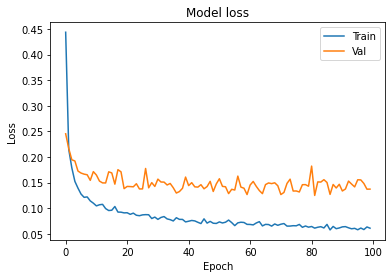

In [ ]:
# Loss chart

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

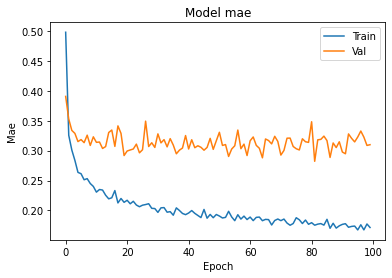

In [ ]:

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

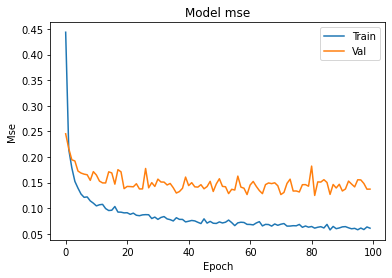

In [ ]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

(9.58, 40.82, 10.558240270614624, 41.79824027061463)

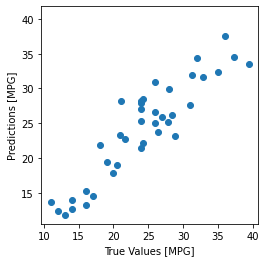

In [ ]:
def unnorm(x):
  return (x *  train_stats_y['std']) +  train_stats_y['mean']






test_predictions = model.predict(normed_test_data_X).flatten()

plt.scatter(unnorm(normed_test_data_y), unnorm(test_predictions) )
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')



In [ ]:
from pandas.core.common import standardize_mapping
